In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import os
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import nilearn
import numpy as np

In [3]:
%matplotlib inline

In [4]:
drop_data = 'data/synthetic_data/'
if not os.path.isdir(drop_data):
    os.makedirs(drop_data)

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data_multidistz_norest_wholebrain.db', mask='data/synthetic_data/wholebrain.nii.gz')
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='data/synthetic_data/wholebrain.nii.gz', num_factors=3, embedding_dim=2)

10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_1.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_2.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_3.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_4.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_2_stimulus_5.nii with mask data/synthetic_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2019 17:58:38 Loading Nifti image data/synthetic_data/nifti_files/subject_10_task_3_stimu

In [7]:
dtfa.load_state('data/synthetic_multidist_k3_n5000_05202019_212311')

In [8]:
dtfa.free_energy(batch_size=1000, blocks_batch_size=1000, use_cuda=True,
                 num_particles=10, sample_size=100)

[[23980716.0, -23609718.0, 370997.59375],
 [23996358.0, -23606712.0, 385653.96875]]

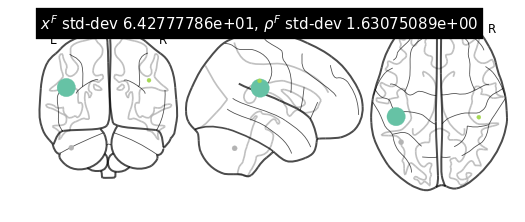

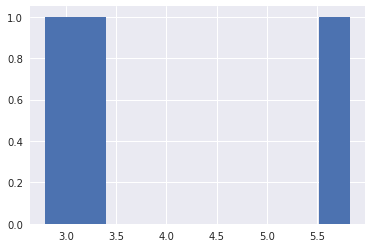

(<nilearn.plotting.displays.OrthoProjector at 0x7f4d2c123908>,
 tensor([[-44.1852, -29.4389,  23.1633],
         [ 42.8244, -30.0572,  30.7677],
         [-38.9382, -56.2833, -40.1573]]),
 tensor([5.8234, 2.7957, 3.2593]))

In [9]:
dtfa.visualize_factor_embedding(filename='factor_embedding_init')

In [10]:
def task_rest_labeler(task):
    if 'rest' in str(task):
        return 'Rest'
    elif 'baseline' in str(task):
        return 'Baseline'
    else:
        return 'Task'

In [11]:
Group_1_last = 5
Group_2_last = 10
def subject_labeler(subject):
    if subject >= 1 and subject <= Group_1_last:
        condition = 0
    elif subject > Group_1_last and subject <= Group_2_last:
        condition = 1
    else:
        condition = 2
    if condition == 0:
        return 'Group 1'
    elif condition == 1:
        return 'Group 2'
    else:
        return 'Group 3'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


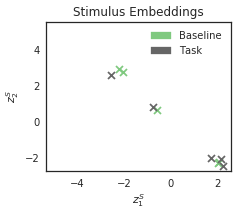

In [12]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_means', plot_ellipse=False)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


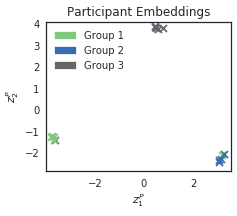

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_means', plot_ellipse=False)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


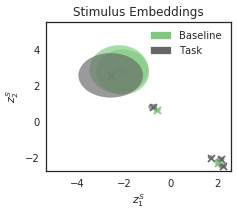

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler, filename='stimuli_embedding_cov', plot_ellipse=True)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


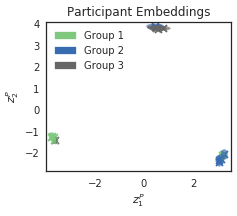

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, filename='participant_embedding_cov', plot_ellipse=True)

In [16]:
def synthetic_multidist_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_rest_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

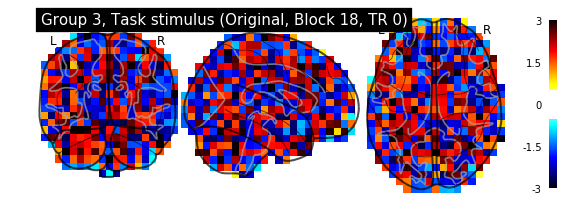

10/01/2019 17:59:46 Reconstruction Error (Frobenius Norm): 3.24921783e+02 out of 3.24936951e+02


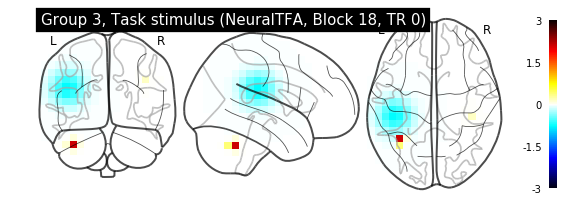

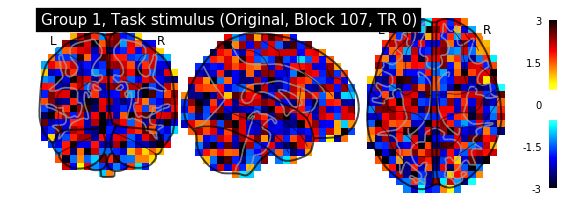

10/01/2019 17:59:48 Reconstruction Error (Frobenius Norm): 3.22587036e+02 out of 3.22612030e+02


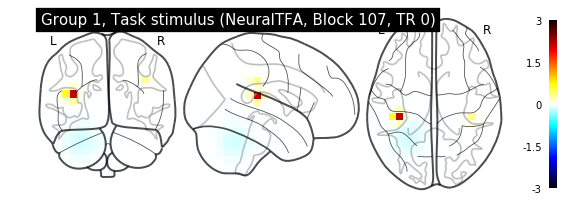

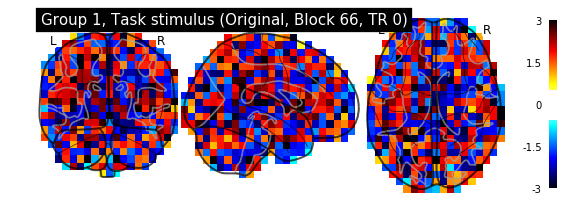

10/01/2019 17:59:50 Reconstruction Error (Frobenius Norm): 3.22361389e+02 out of 3.22440063e+02


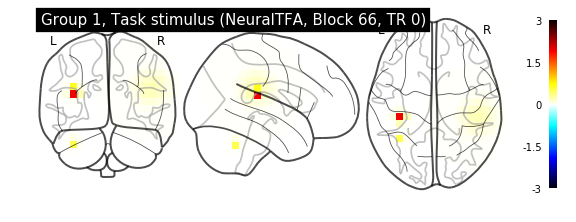

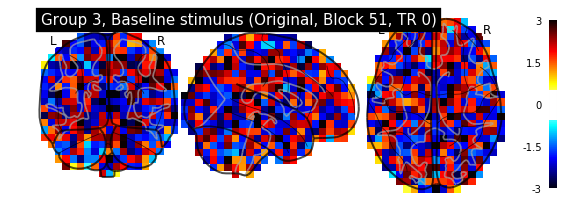

10/01/2019 17:59:53 Reconstruction Error (Frobenius Norm): 3.18180725e+02 out of 3.18054901e+02


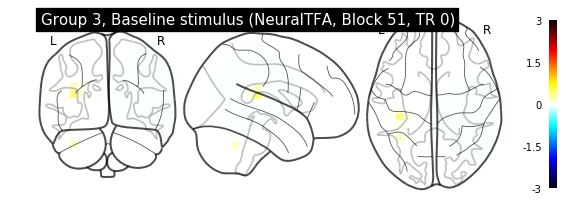

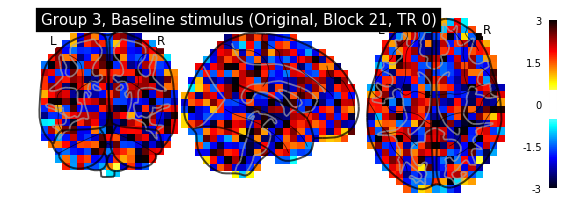

10/01/2019 17:59:55 Reconstruction Error (Frobenius Norm): 3.18799347e+02 out of 3.18625549e+02


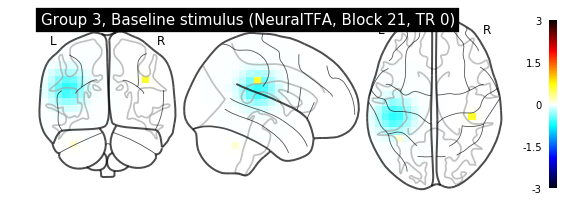

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=synthetic_multidist_labeler)
    dtfa.plot_reconstruction(b, labeler=synthetic_multidist_labeler)

In [18]:
dtfa.average_reconstruction_error(weighted=False)

10/01/2019 17:59:56 Average reconstruction error (MSE): 3.21268374e+02 +/- 2.51958190e+00
10/01/2019 17:59:56 Average data norm (Euclidean): 3.21228869e+02 +/- 2.61661759e+00
10/01/2019 17:59:56 Percent average reconstruction error: 100.012549 +/- 4.14801960e-02


(array([318.03677368, 317.92276001, 317.82339478, 319.18945312,
        319.01815796, 323.04653931, 324.35305786, 324.07919312,
        323.64358521, 324.17541504, 319.28088379, 319.37969971,
        318.6854248 , 318.43734741, 319.80758667, 323.02368164,
        324.91394043, 322.18276978, 324.92178345, 324.25033569,
        319.79696655, 318.79934692, 318.29672241, 318.31872559,
        318.90039062, 323.2611084 , 323.11447144, 323.20834351,
        323.5453186 , 324.89099121, 318.67370605, 318.88006592,
        318.27459717, 319.35650635, 319.01708984, 324.97613525,
        324.98132324, 322.44604492, 324.98742676, 323.16955566,
        318.08718872, 317.62435913, 319.97436523, 318.71887207,
        320.24502563, 322.52572632, 322.4649353 , 323.421875  ,
        323.70309448, 323.956604  , 319.59954834, 318.1807251 ,
        317.597229  , 318.70193481, 319.17440796, 323.07192993,
        325.40524292, 323.46340942, 323.47644043, 323.86419678,
        319.06576538, 318.42605591, 320.

In [19]:
dtfa.average_reconstruction_error()

10/01/2019 17:59:56 Average reconstruction error (MSE): 1.00223440e+00
10/01/2019 17:59:56 Average data norm (Euclidean): 1.00211359e+00
10/01/2019 17:59:56 Percent average reconstruction error: 1.395267


(1.0022344019567215, 1.002113588114858, 0.013952671718535804)